In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [16]:
def fetch_living_cost_data(url,df=None):
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception("Failed to load page")
    data = response.json()
    df = pd.DataFrame(data[1])
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df['country'] = df['country'].apply(lambda x: x['value'])
    df = df[['value', 'country']]
    
    df.sort_index(inplace=True)
    return df

In [17]:
living_cost_data=fetch_living_cost_data("https://api.worldbank.org/v2/country/IN/indicator/FP.CPI.TOTL?format=json")
living_cost_data.to_csv("living_cost_data.csv")

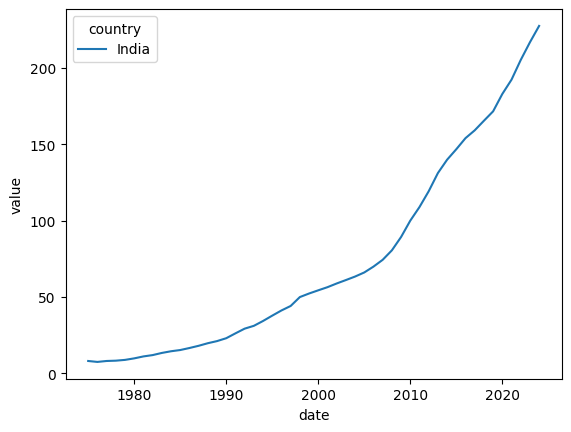

In [18]:
#visualize the data
sns.lineplot(data=living_cost_data, x='date', y='value', hue='country')
plt.show()

In [19]:
def fetch_gdp_data(url,df=None):
    response = requests.get(url)
    if response.status_code!= 200:
        raise Exception("Failed to load page")
    data = response.json()
    df = pd.DataFrame(data[1])
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df['country'] = df['country'].apply(lambda x: x['value'])
    df = df[['value']]
    
    df.sort_index(inplace=True)
    return df

In [20]:
#scrape GDP data
gdp_data=fetch_gdp_data("https://api.worldbank.org/v2/country/IN/indicator/NY.GDP.MKTP.CD?format=json")
gdp_data.to_csv("gdp_data.csv")

In [21]:
#scrape GDP per capita data
gdp_per_capita_data=fetch_gdp_data("https://api.worldbank.org/v2/country/IN/indicator/NY.GDP.PCAP.CD?format=json")
gdp_per_capita_data.to_csv("gdp_per_capita_data.csv")

In [22]:
#merge the data
merged_data = pd.merge(living_cost_data, gdp_data, how='inner', left_index=True, right_index=True)

merged_data = pd.merge(merged_data, gdp_per_capita_data, how='inner', left_index=True, right_index=True)


In [23]:
# specific rename
merged_data.rename(columns={
    'value_x': 'living_cost',
    'value_y': 'gdp',
    'value': 'gdp_per_capita'   
}, inplace=True)

In [24]:
# save the merged data as a CSV file
merged_data.to_csv('merged_data.csv')

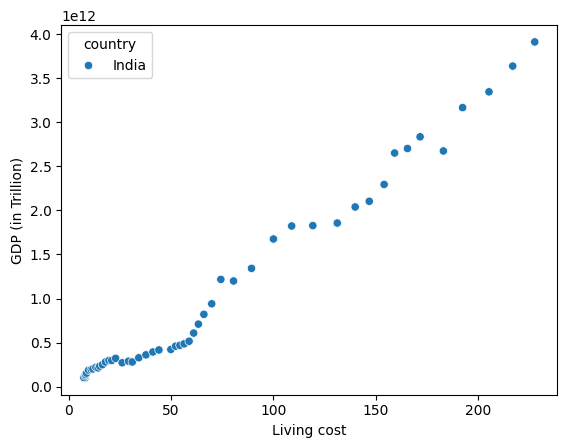

In [29]:
#visualize the merged data
sns.scatterplot(data=merged_data, x='living_cost', y='gdp',hue='country')
plt.xlabel('Living cost')
plt.ylabel('GDP (in Trillion)')
plt.show()

In [32]:
# calculate correlation coefficient
correlation_coefficient = merged_data['living_cost'].corr(merged_data['gdp'])
correlation_coefficient

np.float64(0.9888827739908305)

In [35]:
# calculate correlation coefficient between GDP per capita and Living cost
correlation_coefficient_gdp_per_capita = merged_data['gdp_per_capita'].corr(merged_data['living_cost'])
correlation_coefficient_gdp_per_capita

np.float64(0.9879700549675993)

In [36]:
# calculate the percentage change in GDP 
percentage_change_gdp = ((merged_data['gdp'].iloc[-1] - merged_data['gdp'].iloc[0]) / merged_data['gdp'].iloc[0]) * 100
percentage_change_gdp

np.float64(3873.325794708449)

In [37]:
# calculate the percentage change in  Living cost
percentage_change_living_cost = ((merged_data['living_cost'].iloc[-1] - merged_data['living_cost'].iloc[0]) / merged_data['living_cost'].iloc[0]) * 100
percentage_change_living_cost

np.float64(2736.8489202971214)

In [38]:
# calculate the average GDP 
average_gdp = merged_data['gdp'].mean()
average_gdp

np.float64(1067318382017.2122)

In [41]:
# calculate the average Living cost
average_living_cost = merged_data['living_cost'].mean()
average_living_cost

np.float64(73.10758657348042)

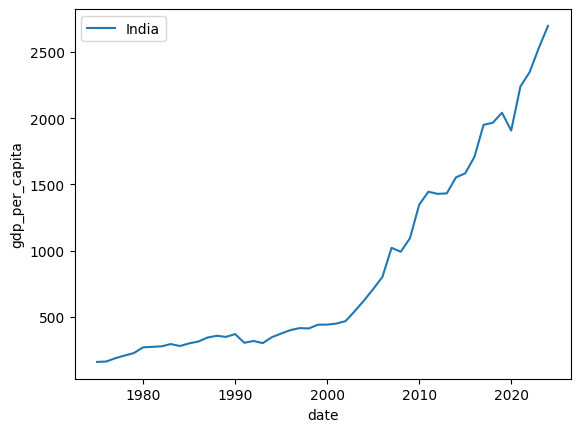

In [51]:
# visualize the GDP per capita
sns.lineplot(data=merged_data, x='date', y='gdp_per_capita', hue='country')
plt.legend()
plt.show()

In [44]:
# calculate the correlation coefficient between GDP per capita and gdp
correlation_coefficient_gdp_per_capita = merged_data['gdp_per_capita'].corr(merged_data['gdp'])
correlation_coefficient_gdp_per_capita

np.float64(0.998986568706321)

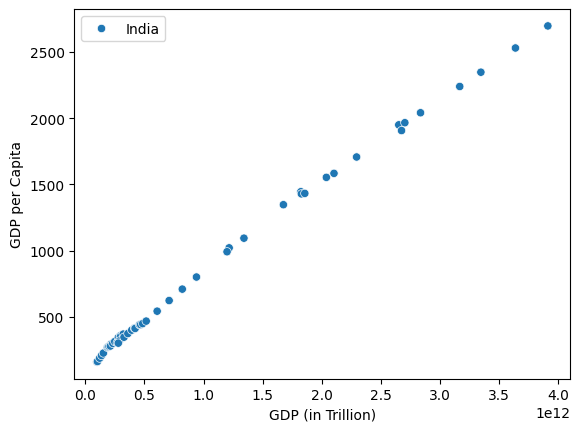

In [50]:
# visualize gdp per capita and gdp
sns.scatterplot(data=merged_data, x='gdp', y='gdp_per_capita', hue='country')
plt.xlabel('GDP (in Trillion)')
plt.ylabel('GDP per Capita')
plt.legend()
plt.show()

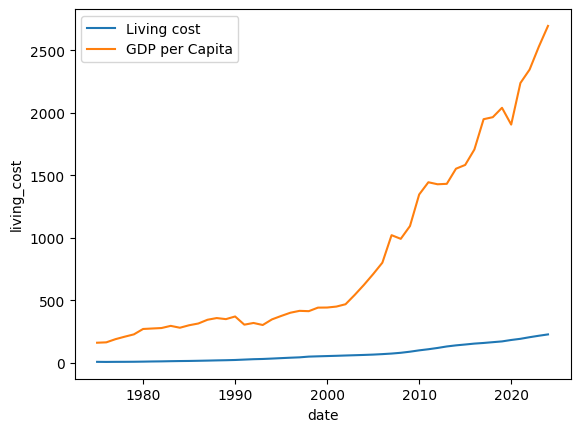

In [49]:
# Visualize the GDP per capita and Living cost line plot
sns.lineplot(data=merged_data, x='date', y='living_cost', label='Living cost')
sns.lineplot(data=merged_data, x='date', y='gdp_per_capita', label='GDP per Capita')
plt.legend()
plt.show()

In [54]:
# Statistical analysis of the GDP per capita
# calculate the standard deviation
standard_deviation_gdp_per_capita = merged_data['gdp_per_capita'].std
standard_deviation_gdp_per_capita

<bound method Series.std of date
1975-01-01     161.086694
1976-01-01     164.120000
1977-01-01     189.585569
1978-01-01     209.389064
1979-01-01     227.958180
1980-01-01     271.080946
1981-01-01     274.964331
1982-01-01     278.650383
1983-01-01     295.999773
1984-01-01     281.049868
1985-01-01     300.928259
1986-01-01     314.897116
1987-01-01     344.941028
1988-01-01     358.484540
1989-01-01     349.915155
1990-01-01     371.085936
1991-01-01     305.574056
1992-01-01     319.182473
1993-01-01     302.884806
1994-01-01     347.734215
1995-01-01     375.176005
1996-01-01     401.046755
1997-01-01     416.228116
1998-01-01     413.630864
1999-01-01     441.927991
2000-01-01     442.750219
2001-01-01     450.357901
2002-01-01     469.149929
2003-01-01     544.143134
2004-01-01     624.258827
2005-01-01     710.488080
2006-01-01     801.668354
2007-01-01    1021.887077
2008-01-01     992.519585
2009-01-01    1094.949746
2010-01-01    1347.519391
2011-01-01    1445.461275
2012-

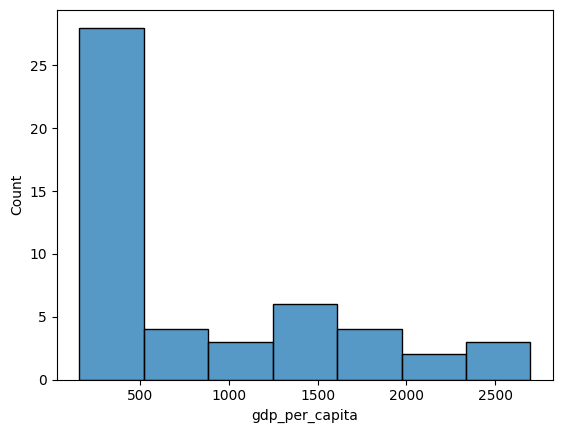

In [55]:
# Visualize the histogram of GDP per capita 
sns.histplot(data=merged_data['gdp_per_capita'])
plt.show()

In [56]:
# descriptive statistics
descriptive_stats = merged_data['gdp_per_capita'].describe()
descriptive_stats

count      50.000000
mean      860.978188
std       737.540544
min       161.086694
25%       307.904821
50%       442.339105
75%      1431.963480
max      2696.663900
Name: gdp_per_capita, dtype: float64

In [57]:
# ------------------- MySQL Integration ------------------- #
import pymysql
from sqlalchemy import create_engine

In [58]:
# MySQL server details
host = 'localhost'
user = 'root'
password = 'Saurabh1042' 
database_name = 'Economic_Data'
table_name = 'Living_Standard'

In [59]:
# Connect to MySQL server
try:
    cnx = pymysql.connect(host=host, user=user, password=password)
    cursor = cnx.cursor()
    print("Connected to MySQL server")
except pymysql.Error as err:
    print(f"Error: {err}")
    exit(1)

Connected to MySQL server


In [60]:
# Create database
cursor.execute(f"CREATE DATABASE IF NOT EXISTS {database_name}")
cursor.execute(f"USE {database_name}")
print("Database created successfully")


Database created successfully


In [61]:
# Create table
create_table_query = f"""
CREATE TABLE IF NOT EXISTS {table_name} (
    id INT AUTO_INCREMENT PRIMARY KEY,
    date DATE,
    country VARCHAR(255),
    living_cost FLOAT,
    gdp FLOAT,
    gdp_per_capita FLOAT
)
"""
cursor.execute(create_table_query)
print("Table created successfully")

Table created successfully


In [62]:
# change column names to match MySQL requirements
merged_data.rename(columns={'date': 'date', 'country_x': 'country', 'value_x': 'living_cost', 'value_y': 'gdp', 'gdp_per_capita': 'gdp_per_capita'}, inplace=True)


In [64]:
# Insert data
for index, row in merged_data.iterrows():
    insert_query = f"""
    INSERT INTO {table_name} (date, country, living_cost, gdp, gdp_per_capita)
    VALUES (%s, %s, %s, %s, %s)
    """
    cursor.execute(insert_query, (index.date(), row['country'], row['living_cost'], row['gdp'], row['gdp_per_capita']))

cnx.commit()
cursor.close()
cnx.close()
print("Data inserted into MySQL successfully")

Data inserted into MySQL successfully
